In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"H:\学习小分队\机器学习\sklearn-learning\titanic\data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#筛选特征
data.drop(["Cabin","Name","Ticket"],inplace = True,axis=1)#删除特征,inplace=True:覆盖原表,axis:对列进行操作
# data =data.drop(["Cabin","Name","Ticket"],inplace = False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [7]:
#处理缺失值

data["Age"] = data["Age"].fillna(data["Age"].mean())#对其用均值进行填补

In [8]:
data = data.dropna()#有缺失值的删掉

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [10]:
#字符转换成数字

lablels = data["Embarked"].unique().tolist()#压缩，看到底有多少种取值，转换成列表
#将lablels中的字母换成其索引数字
data.loc[:,"Embarked"] = data["Embarked"].apply(lambda x: lablels.index(x))

lablels = data["Sex"].unique().tolist()#压缩，看到底有多少种取值，转换成列表
# 将lablels中的字母换成其索引数字
data.loc[:,"Sex"] = data["Sex"].apply(lambda x: lablels.index(x))
#方法二
# data["Sex"] = (data["Sex"] == "male").astype("int")

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [12]:
x = data.iloc[:, data.columns != "Survived"]
y = data.iloc[:, data.columns == "Survived"]

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)

In [14]:

#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [15]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,839,3,0,32.000000,0,0,56.4958,0
1,479,3,0,22.000000,0,0,7.5208,0
2,788,3,0,8.000000,4,1,29.1250,2
3,279,3,0,7.000000,4,1,29.1250,2
4,886,3,1,39.000000,0,5,29.1250,2
...,...,...,...,...,...,...,...,...
617,20,3,1,29.699118,0,0,7.2250,1
618,191,2,1,32.000000,0,0,13.0000,0
619,749,1,0,19.000000,1,0,53.1000,0
620,372,3,0,18.000000,1,0,6.4958,0


In [16]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7378277153558053

In [17]:
#交叉验证
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf, x, y, cv=10).mean()
score

0.7503447395301327

0.8166624106230849


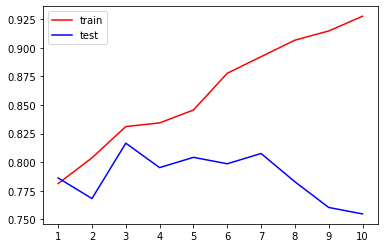

In [18]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0
                            ,max_depth=i+1
                            ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11), tr, color="red", label="train")
plt.plot(range(1,11), te, color="blue", label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


In [19]:
#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术

In [20]:
import numpy as np
gini_threholds = np.linspace(0, 0.5, 20)#生成0-0.5由小到大50个数

#一串参数和这些参数对应的，我们希望网格搜索来搜索的参数的取值范围
parameters = {
    "criterion":("gini","entropy")
    ,"splitter":("best","random")
    ,"max_depth":[*range(1,10)]
    ,"min_samples_leaf":[*range(1,50,5)]
    ,"min_impurity_decrease":[*np.linspace(0,0.5,10)]
}

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain, Ytrain)
'''1.模型 2.有这参数和参数取值范围的列表 3.交叉验证的次数
同时有fit， score，cross_val_score三种功能 '''

'1.模型 2.有这参数和参数取值范围的列表 3.交叉验证的次数\n同时有fit， score，cross_val_score三种功能 '

In [21]:
GS.best_params_ #从我们的输入的参数和参数取值的列表中，返回最佳组合

{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [22]:
GS.best_score_ #网格搜索后的模型的评判标准，一般一两个一起用

0.8198412698412699